In [1]:
!kaggle datasets list

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                  8KB  2023-02-01 12:22:51           8023        257  1.0              
amaanansari09/top-100-songs                                        Top 100 songs                                     6KB  2023-02-16 18:55:35           1838         69  1.0              
datascientistanna/customers-dataset                                Shop Customer Data                               23KB  2023-02-07 18:42:21           6432        150  1.0              
thedevastator/airbnb-prices-in-european-cities                   

In [3]:
!kaggle datasets list -s flowers

ref                                     title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------  -----------------------------------  ------  -------------------  -------------  ---------  ---------------  
alxmamaev/flowers-recognition           Flowers Recognition                   225MB  2021-07-16 16:00:32          81674       1721  0.625            
l3llff/flowers                          🌸 | Flowers                           228MB  2022-04-29 20:37:05           2612         58  0.875            
imsparsh/flowers-dataset                Flowers Dataset                       205MB  2021-02-19 21:41:06           1862         27  0.9411765        
cdeotte/oxford-flowers-tfrecords        Oxford Flowers TFRecords                6GB  2020-03-12 16:20:14            163         45  0.625            
muhammedtausif/rose-flowers             Rose Flowers                          191MB  2022-04-03 17:3

In [4]:
!kaggle datasets download -d alxmamaev/flowers-recognition


  0%|          | 0.00/225M [00:00<?, ?B/s]
  0%|          | 1.00M/225M [00:00<03:33, 1.10MB/s]
  1%|          | 2.00M/225M [00:02<03:52, 1.00MB/s]
  1%|▏         | 3.00M/225M [00:03<03:59, 970kB/s] 
  2%|▏         | 4.00M/225M [00:04<03:55, 983kB/s]
  2%|▏         | 5.00M/225M [00:05<03:54, 981kB/s]
  3%|▎         | 6.00M/225M [00:06<03:54, 977kB/s]
  3%|▎         | 7.00M/225M [00:07<03:53, 977kB/s]
  4%|▎         | 8.00M/225M [00:08<03:54, 969kB/s]
  4%|▍         | 9.00M/225M [00:09<03:51, 978kB/s]
  4%|▍         | 10.0M/225M [00:10<03:50, 975kB/s]
  5%|▍         | 11.0M/225M [00:11<03:50, 973kB/s]
  5%|▌         | 12.0M/225M [00:12<03:49, 971kB/s]
  6%|▌         | 13.0M/225M [00:13<03:48, 972kB/s]
  6%|▌         | 14.0M/225M [00:15<03:46, 974kB/s]
  7%|▋         | 15.0M/225M [00:16<03:46, 972kB/s]
  7%|▋         | 16.0M/225M [00:17<03:45, 971kB/s]
  8%|▊         | 17.0M/225M [00:18<03:44, 972kB/s]
  8%|▊         | 18.0M/225M [00:19<03:42, 973kB/s]
  8%|▊         | 19.0M/225M [00:20<

In [5]:
# Unzip the dataset
!tar -xf flowers-recognition.zip

In [1]:
# Import modules
import os
from PIL import Image
import random
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
import random
import numpy as np

c:\Users\Riccardo\miniconda3\envs\testCUDA\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Create funtions to seet random seeds for reproducibility
def _init_seed(seed):
  os.environ['PYTHONHASHSEED'] = str(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
  np.random.seed(seed)  # Numpy module.
  random.seed(seed)  # Python random module.
  torch.backends.cudnn.benchmark = False
  torch.backends.cudnn.deterministic = True

def _init_fn(worker_id):
    np.random.seed(0 + worker_id)

Number of images of  daisy : 764
Number of images of  dandelion : 1052
Number of images of  rose : 784
Number of images of  sunflower : 733
Number of images of  tulip : 984


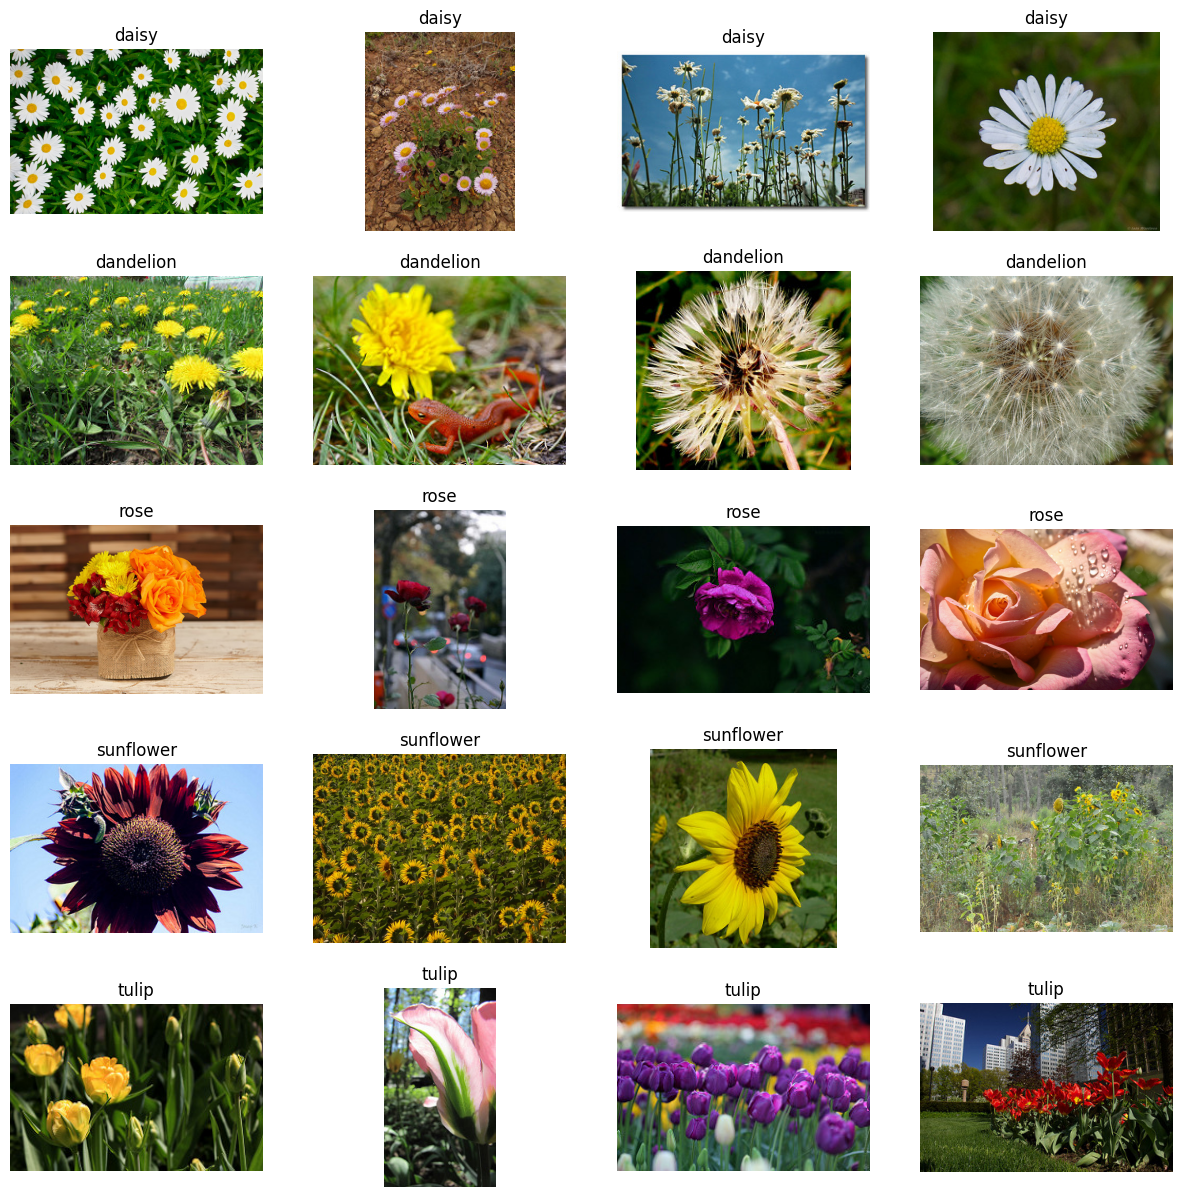

In [3]:
# Explore the data
fig = plt.figure(figsize=(15,15)) 
tot_images = 20
num_images_for_each = 4
for num_folder, folder in enumerate(os.listdir("flowers")):
    print("Number of images of ", folder,":",len(os.listdir("flowers/" + folder)))
    files = os.listdir("flowers/" + folder)
    random.shuffle(files)
    for num, fn in enumerate(files[:num_images_for_each]):
        path = os.path.join("flowers/" + folder,fn)
        img = Image.open(path)
        plt.subplot(tot_images//4,4,num_folder*4+num+1)
        plt.title(folder)
        plt.axis('off')
        plt.imshow(img)
plt.show()

In [4]:
from workers import FlowerDataset

dataset = FlowerDataset("flowers")

_init_seed(0)

image, label = dataset.__getitem__(0)

# Try to sample 1000 images and see the class distribution
labels = []
for i in range(2000):
    _, label = dataset.__getitem__(i)
    labels.append(label)

print(labels.count(0))
print(labels.count(1))
print(labels.count(2))
print(labels.count(3))
print(labels.count(4))

401
396
395
427
381


In [5]:
class SimpleNet(nn.Module):
    def __init__(self, n_classes):
        super(SimpleNet, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm1 = nn.BatchNorm2d(num_features=32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm2 = nn.BatchNorm2d(num_features=64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm3 = nn.BatchNorm2d(num_features=32)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1, bias=False) # Important bias = False
        self.norm4 = nn.BatchNorm2d(num_features=16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.final_pool = nn.AdaptiveAvgPool2d(output_size=(16,16))
        self.fc1 = nn.Linear(in_features=16**3, out_features=128, bias=False) # Important bias = False
        self.norm5 = nn.BatchNorm1d(num_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=n_classes)
        self.dropout = nn.Dropout(p=0.3)
        self.relu = nn.ReLU()

    def forward(self, imgs):
        out_first_conv = self.relu(self.pool(self.conv1(imgs)))
        out_first_conv = self.dropout(self.norm1(out_first_conv))

        out_second_conv = self.relu(self.pool(self.conv2(out_first_conv)))
        out_second_conv = self.dropout(self.norm2(out_second_conv))

        out_third_conv = self.relu(self.conv3(out_second_conv))
        out_third_conv = self.dropout(self.norm3(out_third_conv))

        out_fourth_conv = self.relu(self.pool(self.conv4(out_third_conv)))
        out_fourth_conv = self.dropout(self.norm4(self.final_pool(out_fourth_conv)))
        
        out_first_fc = self.relu(self.fc1(out_fourth_conv.view(out_fourth_conv.shape[0],-1)))
        out_first_fc = self.dropout(self.norm5(out_first_fc))
        
        out_second_fc = self.fc2(out_first_fc)
        return out_second_fc

In [8]:
# Build datasets, dataloader
import torchvision.transforms as transf

transforms_train = transf.Compose([transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
transforms_test_val = transf.Compose([transf.Resize((128,128)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [9]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
from workers import get_loaders

trainloader, valloader = get_loaders(transforms_train,transforms_test_val)

_init_seed(0)

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = SimpleNet(n_classes=5)
model.to(device)

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 20 

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

Tot model parameters: 567813
Epoch: 0


100%|██████████| 43/43 [00:04<00:00, 10.24it/s]



Training loss epoch  0 : 1.295766898169922
Training accuracy epoch  0 : 0.4561696658174299
Validation loss epoch  0 : 1.3238577108050502
Validation accuracy epoch  0 : 0.48961794099142386
Epoch: 1


100%|██████████| 43/43 [00:03<00:00, 10.81it/s]



Training loss epoch  1 : 1.1354145035339198
Training accuracy epoch  1 : 0.5479434447453997
Validation loss epoch  1 : 1.5387301652930503
Validation accuracy epoch  1 : 0.4107142860113188
Epoch: 2


100%|██████████| 43/43 [00:03<00:00, 12.84it/s]



Training loss epoch  2 : 1.0243727044611786
Training accuracy epoch  2 : 0.5974935732954265
Validation loss epoch  2 : 1.3376998631067054
Validation accuracy epoch  2 : 0.46303986740666764
Epoch: 3


100%|██████████| 43/43 [00:02<00:00, 15.76it/s]



Training loss epoch  3 : 0.986441296829356
Training accuracy epoch  3 : 0.6113110540152209
Validation loss epoch  3 : 1.4209068472995314
Validation accuracy epoch  3 : 0.45224252551100974
Epoch: 4


100%|██████████| 43/43 [00:02<00:00, 14.38it/s]



Training loss epoch  4 : 0.9223163057415529
Training accuracy epoch  4 : 0.6404241645244216
Validation loss epoch  4 : 1.3245543588039488
Validation accuracy epoch  4 : 0.47799003401467965
Epoch: 5


100%|██████████| 43/43 [00:03<00:00, 14.11it/s]



Training loss epoch  5 : 0.8518436516235297
Training accuracy epoch  5 : 0.6767352185089974
Validation loss epoch  5 : 1.279330839251363
Validation accuracy epoch  5 : 0.48629568136015605
Epoch: 6


100%|██████████| 43/43 [00:03<00:00, 11.88it/s]



Training loss epoch  6 : 0.8416652419343399
Training accuracy epoch  6 : 0.6799485861182519
Validation loss epoch  6 : 1.2390987138415492
Validation accuracy epoch  6 : 0.5369601332864096
Epoch: 7


100%|██████████| 43/43 [00:02<00:00, 15.04it/s]



Training loss epoch  7 : 0.7767565235457261
Training accuracy epoch  7 : 0.7106041131411849
Validation loss epoch  7 : 1.3434135796025741
Validation accuracy epoch  7 : 0.4406146185342656
Epoch: 8


100%|██████████| 43/43 [00:02<00:00, 15.07it/s]



Training loss epoch  8 : 0.748569572569472
Training accuracy epoch  8 : 0.7222365038637024
Validation loss epoch  8 : 1.2671093573403913
Validation accuracy epoch  8 : 0.5685215952784516
Epoch: 9


100%|██████████| 43/43 [00:02<00:00, 14.58it/s]



Training loss epoch  9 : 0.7395512867709358
Training accuracy epoch  9 : 0.7303341902926526
Validation loss epoch  9 : 1.338702526896499
Validation accuracy epoch  9 : 0.5008305650810863
Epoch: 10


100%|██████████| 43/43 [00:03<00:00, 11.48it/s]



Training loss epoch  10 : 0.7035795133034184
Training accuracy epoch  10 : 0.7352185089974294
Validation loss epoch  10 : 1.2045133806938348
Validation accuracy epoch  10 : 0.5834717611933864
Epoch: 11


100%|██████████| 43/43 [00:03<00:00, 12.54it/s]



Training loss epoch  11 : 0.661633569277957
Training accuracy epoch  11 : 0.7520565553005679
Validation loss epoch  11 : 1.3370171923970067
Validation accuracy epoch  11 : 0.5394518278365912
Epoch: 12


100%|██████████| 43/43 [00:02<00:00, 14.95it/s]



Training loss epoch  12 : 0.659248266263762
Training accuracy epoch  12 : 0.7526992288224188
Validation loss epoch  12 : 1.2470580457254898
Validation accuracy epoch  12 : 0.5544019937515259
Epoch: 13


100%|██████████| 43/43 [00:03<00:00, 14.21it/s]



Training loss epoch  13 : 0.6335534117062478
Training accuracy epoch  13 : 0.7589974293059126
Validation loss epoch  13 : 1.321738229241482
Validation accuracy epoch  13 : 0.5710132898286332
Epoch: 14


100%|██████████| 43/43 [00:02<00:00, 17.35it/s]



Training loss epoch  14 : 0.6221846215101318
Training accuracy epoch  14 : 0.7748714653262749
Validation loss epoch  14 : 1.2336667928584786
Validation accuracy epoch  14 : 0.550249169732249
Epoch: 15


100%|██████████| 43/43 [00:02<00:00, 19.61it/s]



Training loss epoch  15 : 0.6374835000303993
Training accuracy epoch  15 : 0.7706940874342441
Validation loss epoch  15 : 1.3427110480707745
Validation accuracy epoch  15 : 0.5714285720226376
Epoch: 16


100%|██████████| 43/43 [00:02<00:00, 15.54it/s]



Training loss epoch  16 : 0.5734246958880315
Training accuracy epoch  16 : 0.801349614457177
Validation loss epoch  16 : 1.1930857522543086
Validation accuracy epoch  16 : 0.5855481735495633
Epoch: 17


100%|██████████| 43/43 [00:02<00:00, 19.09it/s]



Training loss epoch  17 : 0.5709373365062981
Training accuracy epoch  17 : 0.7894601543029354
Validation loss epoch  17 : 1.237435443456783
Validation accuracy epoch  17 : 0.5419435223867727
Epoch: 18


100%|██████████| 43/43 [00:03<00:00, 12.91it/s]



Training loss epoch  18 : 0.5696763481877763
Training accuracy epoch  18 : 0.7908097686375322
Validation loss epoch  18 : 1.0903519733354103
Validation accuracy epoch  18 : 0.6270764123561771
Epoch: 19


100%|██████████| 43/43 [00:03<00:00, 11.60it/s]


Training loss epoch  19 : 0.49124555345289506
Training accuracy epoch  19 : 0.8274421593830334
Validation loss epoch  19 : 1.1462494058664454
Validation accuracy epoch  19 : 0.614202658104342


In [17]:
# Save the weights of the network
torch.save(model.state_dict(), "weights/weight_1.pth")

In [10]:
# Build datasets, dataloader
import torchvision.transforms as transf

transforms_train = transf.Compose([transf.Resize((256,256)), 
                                   transf.CenterCrop(224),
                                   transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
transforms_test_val = transf.Compose([transf.Resize((256,256)), 
                                      transf.CenterCrop(224),
                                      transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [11]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
from workers import get_loaders
from torchvision.models import resnet18, ResNet18_Weights

trainloader, valloader = get_loaders(transforms_train,transforms_test_val)

_init_seed(0)

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = resnet18(weights = ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(in_features=512, out_features=5)
model.to(device)

for name, param in model.named_parameters():
  if "fc" not in name:
    param.requires_grad = False

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))
print("Trainable parameters:", sum([param.numel() for param in model.parameters() if param.requires_grad]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 5 

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

Tot model parameters: 11179077
Epoch: 0


100%|██████████| 43/43 [00:03<00:00, 10.78it/s]



Training loss epoch  0 : 0.859773600737356
Training accuracy epoch  0 : 0.6781491002877145
Validation loss epoch  0 : 0.4882259053546329
Validation accuracy epoch  0 : 0.804817277331685
Epoch: 1


 20%|█▉        | 76/389 [00:02<00:11, 26.20it/s]

In [44]:
# Save the weights of the network
torch.save(model.state_dict(), "weights/weight_with_decay.pth")

# CONSTRAINING THE REPRESENTATION CAPABILITY OF THE NETWORK

When dealing with data, the best way to reduce overfitting is always provide more data to the network. But how can we do if we don't have more data? One way can be to augment the data that we already have, to synthetically increase the size of the dataset. This is a very powerful technique, but depending on the task cna be more or less difficult to do. 
For example, when dealing with object detection, we must transform both the input data and the labels accordingly. When dealing with text, more particular types of augmentation are used, such as word dropout, word swap, etc.

In the simple case of classification, we want instead that the network is able to recognize what is the category of the image, so the label in this case does not have a structure.
In this case we can augment the dataset by applying different transformations to the input and leaving the label as it is. Let's try!

We will experiment with the following transformations:
- Random rotation
- Random horizontal flip
- Random vertical flip
- Random crop

# INCREASING THE VARIABILITY ON THE TRAINING SET 
In this case, the approach is different, we will reduce overfitting by introducing the so called augmentations on the training set. Augmentations refers to artificially created configuration on the input data, that indeed does not affect the label. In the case of classification, we can assume that both an image and its flipped version are images of the same label (eg cat). A lot of different forms of image augmentations have been conceived, and pytorch make it very straightforward to apply those transformations directly when data are passed to the dataloader. 
On this link, several different transformation can be found, which can be applied in different contexts (https://pytorch.org/vision/stable/transforms.html)

In [34]:
import torchvision.transforms as transf

transforms_train = transf.Compose([
                            transf.Resize((256,256)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                            transf.RandomHorizontalFlip(0.5),
                            transf.RandomApply([transf.RandomRotation((0,360))],p=0.5),
                            transf.RandomVerticalFlip(0.5),
                            transf.RandomApply([transf.RandomResizedCrop((256,256), scale=(0.7,1.0))], p=0.5)
                            ])
transforms_test_val = transf.Compose([
                            transf.Resize((256,256)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])

In [48]:
from workers import get_datasets, get_loaders
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

_init_seed(0)

trainset, valset, testset = get_datasets("train", "test", 0.1, 0.5, transforms_train, transforms_test_val)
trainloader, valloader, testloader = get_loaders(trainset, valset, testset, 16, 4, True)

##############################################################################

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = SimpleNet()
model.to(device)

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 20 

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate, weight_decay=1e-7)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

Tot model parameters: 567570
Epoch: 0


100%|██████████| 79/79 [00:11<00:00,  7.17it/s]



Training loss epoch  0 : 0.6639851120469923
Training accuracy epoch  0 : 0.6177201704545454
Validation loss epoch  0 : 0.6351478948623319
Validation accuracy epoch  0 : 0.6075949367088608
Epoch: 1


100%|██████████| 79/79 [00:10<00:00,  7.28it/s]



Training loss epoch  1 : 0.6037290783768351
Training accuracy epoch  1 : 0.6629083806818182
Validation loss epoch  1 : 0.6022542952736721
Validation accuracy epoch  1 : 0.6613924050632911
Epoch: 2


100%|██████████| 79/79 [00:11<00:00,  6.66it/s]



Training loss epoch  2 : 0.5930009549906985
Training accuracy epoch  2 : 0.6763139204545454
Validation loss epoch  2 : 0.7822353409815438
Validation accuracy epoch  2 : 0.5878164556962026
Epoch: 3


100%|██████████| 79/79 [00:09<00:00,  8.14it/s]



Training loss epoch  3 : 0.5713161555626853
Training accuracy epoch  3 : 0.6922052556818182
Validation loss epoch  3 : 0.5917009786714481
Validation accuracy epoch  3 : 0.6906645569620253
Epoch: 4


100%|██████████| 79/79 [00:11<00:00,  6.65it/s]



Training loss epoch  4 : 0.5695279653353448
Training accuracy epoch  4 : 0.7006392045454546
Validation loss epoch  4 : 0.6968218706831147
Validation accuracy epoch  4 : 0.617879746835443
Epoch: 5


100%|██████████| 79/79 [00:11<00:00,  7.05it/s]



Training loss epoch  5 : 0.5553229030391033
Training accuracy epoch  5 : 0.7105823863636364
Validation loss epoch  5 : 0.8112528288288962
Validation accuracy epoch  5 : 0.6060126582278481
Epoch: 6


100%|██████████| 79/79 [00:10<00:00,  7.20it/s]



Training loss epoch  6 : 0.5479838444258679
Training accuracy epoch  6 : 0.7200816761363636
Validation loss epoch  6 : 0.7945521283376066
Validation accuracy epoch  6 : 0.5965189873417721
Epoch: 7


100%|██████████| 79/79 [00:11<00:00,  7.02it/s]



Training loss epoch  7 : 0.5457868129014969
Training accuracy epoch  7 : 0.7186612215909091
Validation loss epoch  7 : 0.8437061880396891
Validation accuracy epoch  7 : 0.6210443037974683
Epoch: 8


100%|██████████| 79/79 [00:10<00:00,  7.70it/s]



Training loss epoch  8 : 0.5380160685374655
Training accuracy epoch  8 : 0.7287819602272727
Validation loss epoch  8 : 0.7016254107031641
Validation accuracy epoch  8 : 0.6162974683544303
Epoch: 9


100%|██████████| 79/79 [00:11<00:00,  6.77it/s]



Training loss epoch  9 : 0.5322258110285144
Training accuracy epoch  9 : 0.7294921875
Validation loss epoch  9 : 1.2397995289367965
Validation accuracy epoch  9 : 0.5427215189873418
Epoch: 10


100%|██████████| 79/79 [00:12<00:00,  6.56it/s]



Training loss epoch  10 : 0.529329650760205
Training accuracy epoch  10 : 0.7332208806818182
Validation loss epoch  10 : 0.5572860482372816
Validation accuracy epoch  10 : 0.7096518987341772
Epoch: 11


100%|██████████| 79/79 [00:10<00:00,  7.54it/s]



Training loss epoch  11 : 0.5221961385951462
Training accuracy epoch  11 : 0.7386363636363636
Validation loss epoch  11 : 0.8887299308671227
Validation accuracy epoch  11 : 0.6028481012658228
Epoch: 12


100%|██████████| 79/79 [00:12<00:00,  6.55it/s]



Training loss epoch  12 : 0.5185602223500609
Training accuracy epoch  12 : 0.7384588068181818
Validation loss epoch  12 : 0.5917269285721115
Validation accuracy epoch  12 : 0.6740506329113924
Epoch: 13


100%|██████████| 79/79 [00:09<00:00,  7.96it/s]



Training loss epoch  13 : 0.5148901270850647
Training accuracy epoch  13 : 0.7437855113636364
Validation loss epoch  13 : 0.6630754261454449
Validation accuracy epoch  13 : 0.6740506329113924
Epoch: 14


100%|██████████| 79/79 [00:09<00:00,  8.45it/s]



Training loss epoch  14 : 0.508199510524388
Training accuracy epoch  14 : 0.7536399147727273
Validation loss epoch  14 : 0.5627894427957414
Validation accuracy epoch  14 : 0.7112341772151899
Epoch: 15


100%|██████████| 79/79 [00:09<00:00,  8.07it/s]



Training loss epoch  15 : 0.510477600428699
Training accuracy epoch  15 : 0.7529296875
Validation loss epoch  15 : 0.9869120692527746
Validation accuracy epoch  15 : 0.6044303797468354
Epoch: 16


100%|██████████| 79/79 [00:09<00:00,  8.09it/s]



Training loss epoch  16 : 0.5022532180565494
Training accuracy epoch  16 : 0.7543501420454546
Validation loss epoch  16 : 0.6741077600023414
Validation accuracy epoch  16 : 0.6787974683544303
Epoch: 17


100%|██████████| 79/79 [00:09<00:00,  8.05it/s]



Training loss epoch  17 : 0.500847669297152
Training accuracy epoch  17 : 0.7556818181818182
Validation loss epoch  17 : 0.5730121862850611
Validation accuracy epoch  17 : 0.7223101265822784
Epoch: 18


100%|██████████| 79/79 [00:12<00:00,  6.24it/s]



Training loss epoch  18 : 0.49151674160649156
Training accuracy epoch  18 : 0.7614524147727273
Validation loss epoch  18 : 0.6367344398853145
Validation accuracy epoch  18 : 0.6938291139240507
Epoch: 19


100%|██████████| 79/79 [00:11<00:00,  7.11it/s]


Training loss epoch  19 : 0.49253063049929385
Training accuracy epoch  19 : 0.7605646306818182
Validation loss epoch  19 : 0.7396139987284625
Validation accuracy epoch  19 : 0.6685126582278481


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0.9862, 0.0138]], device='cuda:0')
This is a cat!


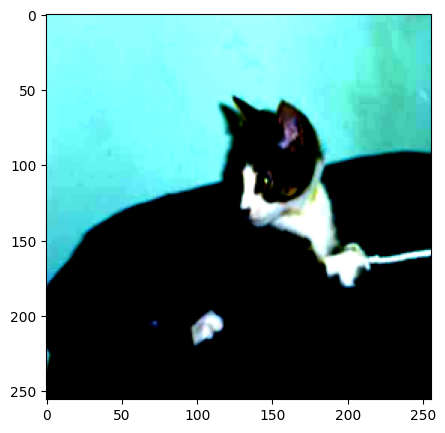

In [52]:
# Test the network on unseen images (Test set)
img = testset.__getitem__(10)

model.eval()
fig = plt.figure(figsize=(5,5))
with torch.no_grad():
  plt.imshow(torch.permute(img,(1,2,0)))
  out = model(img.unsqueeze(0).to(device))
  print(torch.softmax(out,dim=1))
  out = torch.softmax(out, dim=1)
  prediction = torch.argmax(out)
  if(prediction.item()==1):
    print("This is a dog!")
  else:
    print("This is a cat!")


# What can we do more? 

In general, building a network from scratch when dealing with such simple problems is not a good idea.
We can try to leverage the module torchvision.models and borrow an architecture that has been developed by experts and has been tested on several benchmarks.
For example, let's try to see how straightforward it is to use a network, such as ResNet18, and see how it performs on our dataset.

In [7]:
from torchvision.models import mobilenet_v3_small ####################################################################
from workers import get_datasets, get_loaders
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

_init_seed(0)

trainset, valset, testset = get_datasets("train", "test", 0.1, 0.5, transforms_train, transforms_test_val)
trainloader, valloader, testloader = get_loaders(trainset, valset, testset, 16, 4, True)

##############################################################################

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = mobilenet_v3_small() #############################################################
# Replace the last layer of the model with a new one
model.classifier = torch.nn.Sequential(*list(model.classifier.children())[:-1],torch.nn.Linear(1024,2))
# We are ready to train, no other modifications needed

model.to(device)

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 20 

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate, weight_decay=1e-7)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

Tot model parameters: 1519906
Epoch: 0


100%|██████████| 79/79 [00:11<00:00,  6.79it/s]



Training loss epoch  0 : 0.685471646995707
Training accuracy epoch  0 : 0.5601917613636364
Validation loss epoch  0 : 0.6945746661741522
Validation accuracy epoch  0 : 0.49287974683544306
Epoch: 1


100%|██████████| 79/79 [00:13<00:00,  5.92it/s]



Training loss epoch  1 : 0.6717795428227294
Training accuracy epoch  1 : 0.5876242897727273
Validation loss epoch  1 : 0.647322388012198
Validation accuracy epoch  1 : 0.617879746835443
Epoch: 2


100%|██████████| 79/79 [00:14<00:00,  5.43it/s]



Training loss epoch  2 : 0.6416505813090638
Training accuracy epoch  2 : 0.6329012784090909
Validation loss epoch  2 : 0.6172684608381006
Validation accuracy epoch  2 : 0.6526898734177216
Epoch: 3


100%|██████████| 79/79 [00:15<00:00,  5.24it/s]



Training loss epoch  3 : 0.6157594600015066
Training accuracy epoch  3 : 0.6583806818181818
Validation loss epoch  3 : 0.7582631077193007
Validation accuracy epoch  3 : 0.6416139240506329
Epoch: 4


100%|██████████| 79/79 [00:14<00:00,  5.36it/s]



Training loss epoch  4 : 0.5928518292494118
Training accuracy epoch  4 : 0.681640625
Validation loss epoch  4 : 0.5921409624286845
Validation accuracy epoch  4 : 0.6993670886075949
Epoch: 5


100%|██████████| 79/79 [00:15<00:00,  5.24it/s]



Training loss epoch  5 : 0.5826328162696551
Training accuracy epoch  5 : 0.6903409090909091
Validation loss epoch  5 : 0.6058800492105605
Validation accuracy epoch  5 : 0.6716772151898734
Epoch: 6


100%|██████████| 79/79 [00:14<00:00,  5.33it/s]



Training loss epoch  6 : 0.5698504077524624
Training accuracy epoch  6 : 0.703125
Validation loss epoch  6 : 0.665320048981075
Validation accuracy epoch  6 : 0.6637658227848101
Epoch: 7


100%|██████████| 79/79 [00:20<00:00,  3.89it/s]



Training loss epoch  7 : 0.5572850829498335
Training accuracy epoch  7 : 0.7134232954545454
Validation loss epoch  7 : 0.7034645567211923
Validation accuracy epoch  7 : 0.6566455696202531
Epoch: 8


100%|██████████| 79/79 [00:14<00:00,  5.57it/s]



Training loss epoch  8 : 0.5454333764500916
Training accuracy epoch  8 : 0.7181285511363636
Validation loss epoch  8 : 0.5152210566816451
Validation accuracy epoch  8 : 0.7444620253164557
Epoch: 9


100%|██████████| 79/79 [00:14<00:00,  5.45it/s]



Training loss epoch  9 : 0.5386481186459687
Training accuracy epoch  9 : 0.7292258522727273
Validation loss epoch  9 : 0.5527910825949681
Validation accuracy epoch  9 : 0.7128164556962026
Epoch: 10


100%|██████████| 79/79 [00:18<00:00,  4.28it/s]



Training loss epoch  10 : 0.5357747055505487
Training accuracy epoch  10 : 0.7318004261363636
Validation loss epoch  10 : 0.48357473257221756
Validation accuracy epoch  10 : 0.759493670886076
Epoch: 11


100%|██████████| 79/79 [00:13<00:00,  5.79it/s]



Training loss epoch  11 : 0.5156227215404876
Training accuracy epoch  11 : 0.7454723011363636
Validation loss epoch  11 : 0.5166206891778149
Validation accuracy epoch  11 : 0.745253164556962
Epoch: 12


100%|██████████| 79/79 [00:14<00:00,  5.55it/s]



Training loss epoch  12 : 0.5214192043905231
Training accuracy epoch  12 : 0.7421875
Validation loss epoch  12 : 0.5184035767105561
Validation accuracy epoch  12 : 0.7507911392405063
Epoch: 13


100%|██████████| 79/79 [00:15<00:00,  5.05it/s]



Training loss epoch  13 : 0.5051844402809035
Training accuracy epoch  13 : 0.7507102272727273
Validation loss epoch  13 : 0.5125558587569224
Validation accuracy epoch  13 : 0.7468354430379747
Epoch: 14


100%|██████████| 79/79 [00:17<00:00,  4.42it/s]



Training loss epoch  14 : 0.5058570213361897
Training accuracy epoch  14 : 0.7520419034090909
Validation loss epoch  14 : 0.5199441596677031
Validation accuracy epoch  14 : 0.7357594936708861
Epoch: 15


100%|██████████| 79/79 [00:18<00:00,  4.34it/s]



Training loss epoch  15 : 0.5017196782017973
Training accuracy epoch  15 : 0.7546164772727273
Validation loss epoch  15 : 0.48346104576617854
Validation accuracy epoch  15 : 0.7705696202531646
Epoch: 16


100%|██████████| 79/79 [00:16<00:00,  4.68it/s]



Training loss epoch  16 : 0.49228423103605484
Training accuracy epoch  16 : 0.7578125
Validation loss epoch  16 : 0.5913107683764228
Validation accuracy epoch  16 : 0.696993670886076
Epoch: 17


100%|██████████| 79/79 [00:17<00:00,  4.62it/s]



Training loss epoch  17 : 0.48891035152006557
Training accuracy epoch  17 : 0.7646484375
Validation loss epoch  17 : 0.5216737217918227
Validation accuracy epoch  17 : 0.742879746835443
Epoch: 18


100%|██████████| 79/79 [00:19<00:00,  4.06it/s]



Training loss epoch  18 : 0.4834069237112999
Training accuracy epoch  18 : 0.7623401988636364
Validation loss epoch  18 : 0.6085762583379504
Validation accuracy epoch  18 : 0.7143987341772152
Epoch: 19


100%|██████████| 79/79 [00:17<00:00,  4.47it/s]


Training loss epoch  19 : 0.4794748154341836
Training accuracy epoch  19 : 0.7753018465909091
Validation loss epoch  19 : 0.5128572826521306
Validation accuracy epoch  19 : 0.7650316455696202


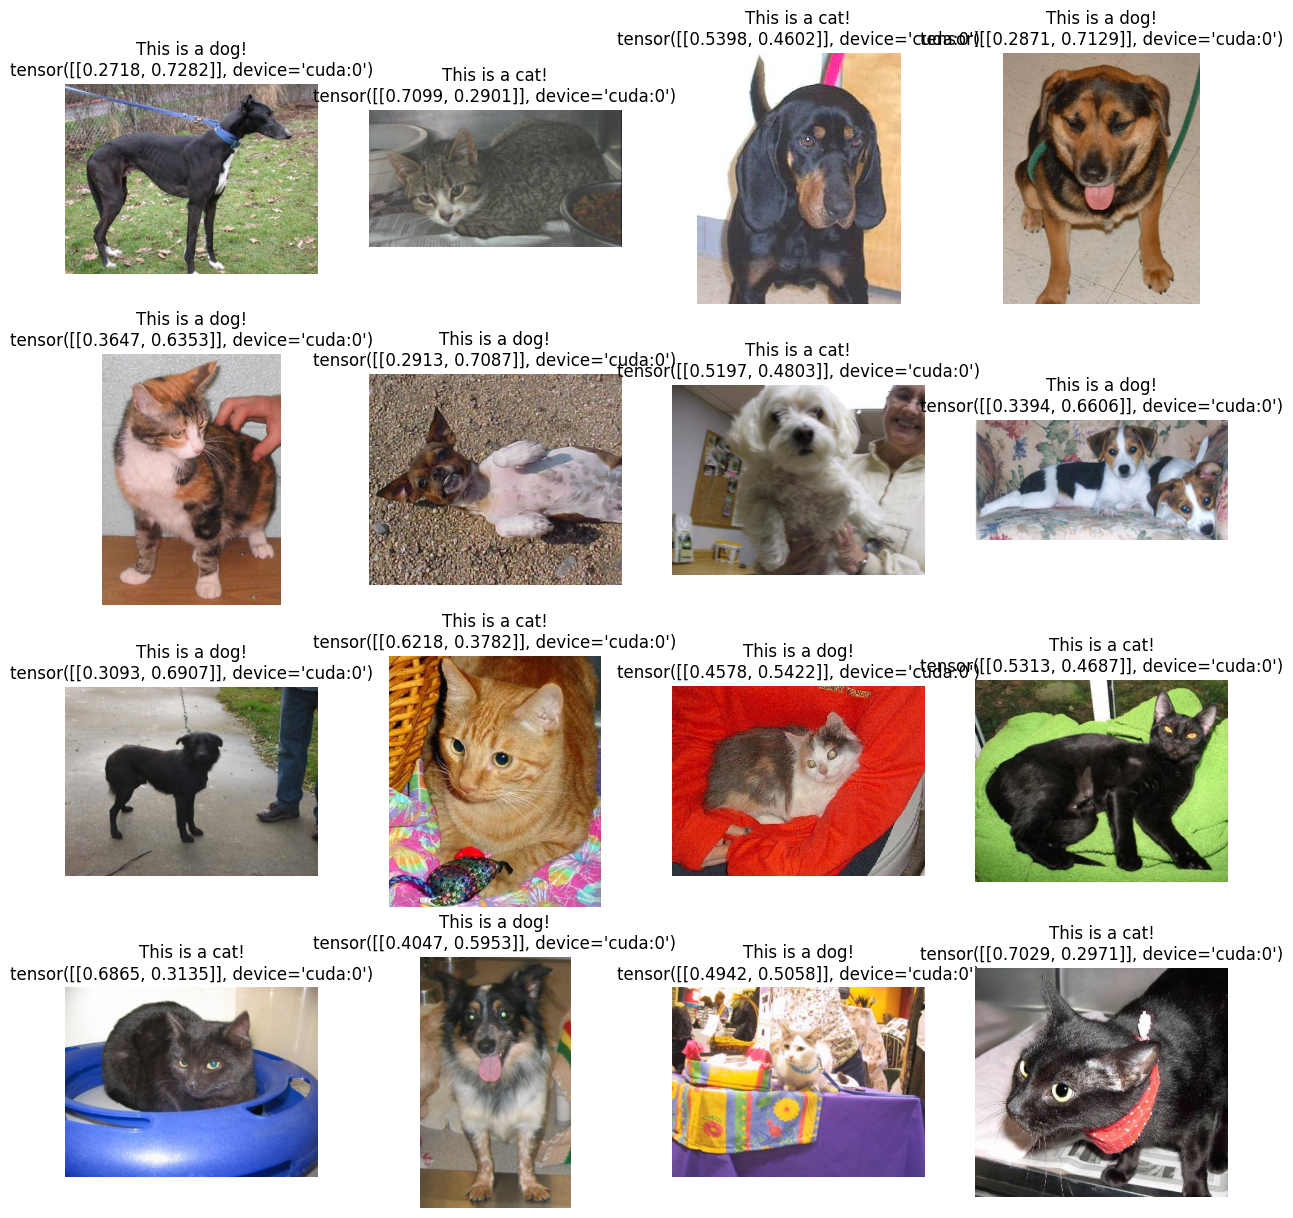

In [26]:
# Explore the data 
files_test = os.listdir("test")
random.seed(0)
random.shuffle(files_test)
fig = plt.figure(figsize=(15,15))
num_images = 16
transforms_test_val = transf.Compose([
                            transf.ToTensor(),
                            transf.Resize((256,256)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])
model.eval()
with torch.no_grad():
  for num, fn in enumerate(files_train[:num_images]):
    path = os.path.join("train",fn)
    img = Image.open(path)
    out = model(transforms_test_val(img).unsqueeze(0).to(device))
    out = torch.softmax(out, dim=1)
    prediction = torch.argmax(out)
    plt.subplot(num_images//4,4,num+1)
    plt.axis('off')
    plt.imshow(img)
    if(prediction.item()==1):
      plt.title("This is a dog!\n"+str(torch.softmax(out,dim=1)))
    else:
      plt.title("This is a cat!\n"+str(torch.softmax(out,dim=1)))

It turns out that we can do even more! 
Transfer learning is a technique that leverages a pretrained network, and just adapts part of it to the specific task.
For example, we can use a pretrained network and fine tune just the last classification layer to our specific needs! This means that we can just tune the last 512x2 parameters!! All the others we keep them fixed, since the pretraining step already teached the network how to recognize the most common features in images.
To add more to this, since in training we just require the computing of the gradients of the last weights, training will be much faster, and we can load bigger networks!
Let's try with Resnet18 (11 millions of parameters)

Let's see how straightforward it is to do this in pytorch!

In [30]:
from torchvision.models import resnet18, ResNet18_Weights ####################################################################
from workers import get_datasets, get_loaders
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

_init_seed(0)

trainset, valset, testset = get_datasets("train", "test", 0.1, 0.5, transforms_train, transforms_test_val)
trainloader, valloader, testloader = get_loaders(trainset, valset, testset, 16, 4, True)

##############################################################################

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = resnet18(weights=ResNet18_Weights.DEFAULT) #############################################################
# Replace the last layer of the model with a new one
model.fc = torch.nn.Linear(model.fc.in_features,2)
# Freeze all the layers except the last one
for name, param in model.named_parameters():
  if name != "fc.weight" and name != "fc.bias":
    param.requires_grad = False
# Check if the model is correctly modified
for name, param in model.named_parameters():
  print(name, param.requires_grad)
# We are ready to train, no other modifications needed


model.to(device)

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))

# Hyperparameters 
learning_rate = 5e-3
epochs = 20

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate, weight_decay=1e-8)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2.bias False
layer2.0.downsample.0.weight False
layer2.0.downsample.1.weight False
layer2.0.downsample.1.bias False
layer2.1.conv1.weight False
layer2.1.bn1.weight False
layer2.1.bn1.bias False
layer2.1.conv2.weight False
layer2.1.bn2.weight False
layer2.1.bn2.bias False
layer3.0.conv1.weight False
layer3.0.bn1.weight False
layer3.0.bn1.bias False
layer3.0.conv2.weight False
layer3.0.bn2.weight False
layer3.0.bn2.bias False
layer3.0.downsample.0.weight False
layer3.0.downsample.1.weight Fa

100%|██████████| 79/79 [00:22<00:00,  3.59it/s]



Training loss epoch  0 : 0.29991645181540993
Training accuracy epoch  0 : 0.8684303977272727
Validation loss epoch  0 : 0.08398637924154725
Validation accuracy epoch  0 : 0.9738924050632911
Epoch: 1


100%|██████████| 79/79 [00:16<00:00,  4.66it/s]



Training loss epoch  1 : 0.23717956260820341
Training accuracy epoch  1 : 0.8998579545454546
Validation loss epoch  1 : 0.12042231606083768
Validation accuracy epoch  1 : 0.9572784810126582
Epoch: 2


100%|██████████| 79/79 [00:19<00:00,  4.08it/s]



Training loss epoch  2 : 0.22367026546271518
Training accuracy epoch  2 : 0.9044744318181818
Validation loss epoch  2 : 0.14480387737172878
Validation accuracy epoch  2 : 0.942246835443038
Epoch: 3


100%|██████████| 79/79 [00:19<00:00,  4.09it/s]



Training loss epoch  3 : 0.21794478467993691
Training accuracy epoch  3 : 0.9082919034090909
Validation loss epoch  3 : 0.10141120593452567
Validation accuracy epoch  3 : 0.9580696202531646
Epoch: 4


100%|██████████| 79/79 [00:23<00:00,  3.31it/s]



Training loss epoch  4 : 0.2149481581436703
Training accuracy epoch  4 : 0.9123757102272727
Validation loss epoch  4 : 0.07437337521549102
Validation accuracy epoch  4 : 0.9762658227848101
Epoch: 5


100%|██████████| 79/79 [00:13<00:00,  5.82it/s]



Training loss epoch  5 : 0.21025527167909208
Training accuracy epoch  5 : 0.9117542613636364
Validation loss epoch  5 : 0.0728373378692077
Validation accuracy epoch  5 : 0.9731012658227848
Epoch: 6


100%|██████████| 79/79 [00:20<00:00,  3.79it/s]



Training loss epoch  6 : 0.22397015553063035
Training accuracy epoch  6 : 0.9065163352272727
Validation loss epoch  6 : 0.11660410714913395
Validation accuracy epoch  6 : 0.9572784810126582
Epoch: 7


100%|██████████| 79/79 [00:13<00:00,  5.96it/s]



Training loss epoch  7 : 0.21212783960932444
Training accuracy epoch  7 : 0.9113103693181818
Validation loss epoch  7 : 0.13310815291877104
Validation accuracy epoch  7 : 0.9525316455696202
Epoch: 8


100%|██████████| 79/79 [00:14<00:00,  5.62it/s]



Training loss epoch  8 : 0.2192544487783876
Training accuracy epoch  8 : 0.9075816761363636
Validation loss epoch  8 : 0.0732193283679235
Validation accuracy epoch  8 : 0.9746835443037974
Epoch: 9


100%|██████████| 79/79 [00:12<00:00,  6.11it/s]



Training loss epoch  9 : 0.1997327156872912
Training accuracy epoch  9 : 0.9163707386363636
Validation loss epoch  9 : 0.07287366922261028
Validation accuracy epoch  9 : 0.9707278481012658
Epoch: 10


100%|██████████| 79/79 [00:19<00:00,  4.01it/s]



Training loss epoch  10 : 0.20836424573115603
Training accuracy epoch  10 : 0.9148615056818182
Validation loss epoch  10 : 0.07443465224262386
Validation accuracy epoch  10 : 0.9746835443037974
Epoch: 11


100%|██████████| 79/79 [00:16<00:00,  4.67it/s]



Training loss epoch  11 : 0.21121273532017684
Training accuracy epoch  11 : 0.9129083806818182
Validation loss epoch  11 : 0.15813321831431298
Validation accuracy epoch  11 : 0.944620253164557
Epoch: 12


100%|██████████| 79/79 [00:17<00:00,  4.48it/s]



Training loss epoch  12 : 0.21162997906636025
Training accuracy epoch  12 : 0.9139737215909091
Validation loss epoch  12 : 0.07415056354705174
Validation accuracy epoch  12 : 0.9707278481012658
Epoch: 13


100%|██████████| 79/79 [00:14<00:00,  5.53it/s]



Training loss epoch  13 : 0.21376790748168292
Training accuracy epoch  13 : 0.9113103693181818
Validation loss epoch  13 : 0.08551379006438523
Validation accuracy epoch  13 : 0.9675632911392406
Epoch: 14


100%|██████████| 79/79 [00:15<00:00,  5.13it/s]



Training loss epoch  14 : 0.2129918874733531
Training accuracy epoch  14 : 0.9129971590909091
Validation loss epoch  14 : 0.11832753255303148
Validation accuracy epoch  14 : 0.9549050632911392
Epoch: 15


100%|██████████| 79/79 [00:19<00:00,  4.15it/s]



Training loss epoch  15 : 0.20350812629542567
Training accuracy epoch  15 : 0.9147727272727273
Validation loss epoch  15 : 0.1175387090564222
Validation accuracy epoch  15 : 0.9604430379746836
Epoch: 16


100%|██████████| 79/79 [00:12<00:00,  6.22it/s]



Training loss epoch  16 : 0.19717020057512194
Training accuracy epoch  16 : 0.9197443181818182
Validation loss epoch  16 : 0.11935123253784649
Validation accuracy epoch  16 : 0.9588607594936709
Epoch: 17


100%|██████████| 79/79 [00:14<00:00,  5.62it/s]



Training loss epoch  17 : 0.21629991397573825
Training accuracy epoch  17 : 0.9081143465909091
Validation loss epoch  17 : 0.11215976663036979
Validation accuracy epoch  17 : 0.9596518987341772
Epoch: 18


100%|██████████| 79/79 [00:14<00:00,  5.44it/s]



Training loss epoch  18 : 0.21471191907105755
Training accuracy epoch  18 : 0.9111328125
Validation loss epoch  18 : 0.07437404391320446
Validation accuracy epoch  18 : 0.9715189873417721
Epoch: 19


100%|██████████| 79/79 [00:13<00:00,  5.85it/s]


Training loss epoch  19 : 0.2047483905414331
Training accuracy epoch  19 : 0.9129083806818182
Validation loss epoch  19 : 0.06956854592669826
Validation accuracy epoch  19 : 0.9731012658227848


In [32]:
# Save the weights of the network
torch.save(model.state_dict(), "weights/resnet18_only_last_layer.pth")

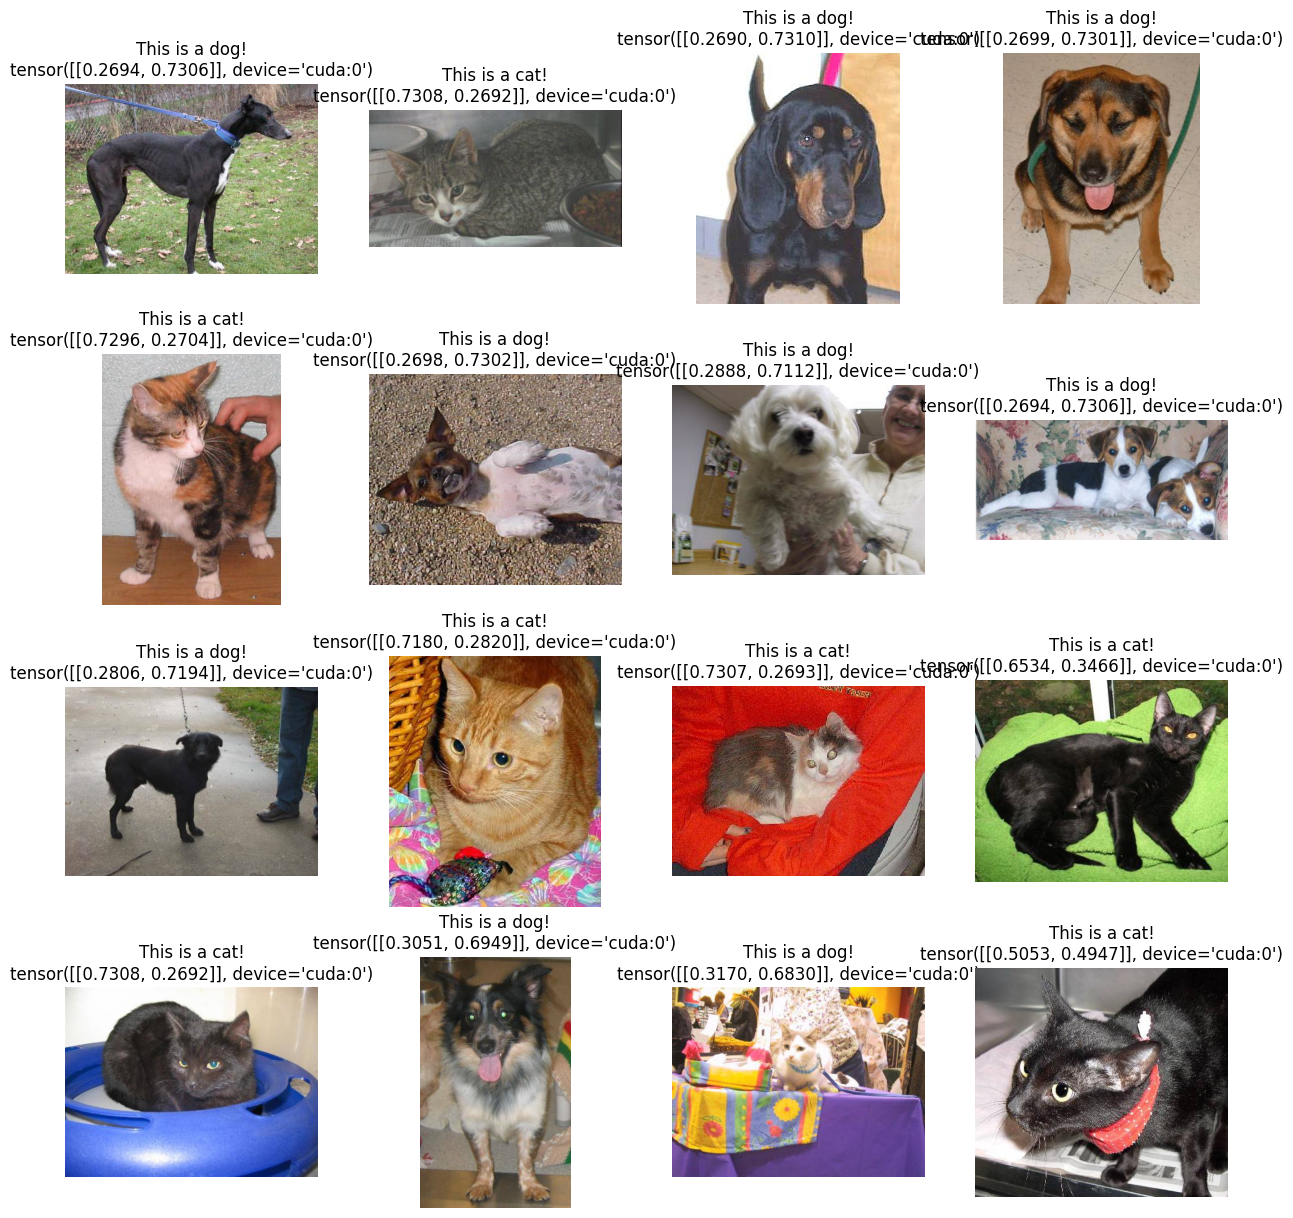

In [31]:
# Explore the data 
files_test = os.listdir("test")
random.seed(0)
random.shuffle(files_test)
fig = plt.figure(figsize=(15,15))
num_images = 16
transforms_test_val = transf.Compose([
                            transf.ToTensor(),
                            transf.Resize((256,256)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])
model.eval()
with torch.no_grad():
  for num, fn in enumerate(files_train[:num_images]):
    path = os.path.join("train",fn)
    img = Image.open(path)
    out = model(transforms_test_val(img).unsqueeze(0).to(device))
    out = torch.softmax(out, dim=1)
    prediction = torch.argmax(out)
    plt.subplot(num_images//4,4,num+1)
    plt.axis('off')
    plt.imshow(img)
    if(prediction.item()==1):
      plt.title("This is a dog!\n"+str(torch.softmax(out,dim=1)))
    else:
      plt.title("This is a cat!\n"+str(torch.softmax(out,dim=1)))

In [35]:
from torchvision.models import resnet18, ResNet18_Weights ####################################################################
from workers import get_datasets, get_loaders
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

_init_seed(0)

trainset, valset, testset = get_datasets("train", "test", 0.1, 0.5, transforms_train, transforms_test_val)
trainloader, valloader, testloader = get_loaders(trainset, valset, testset, 16, 4, True)

##############################################################################

# Use cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the model 
model = resnet18(weights=ResNet18_Weights.DEFAULT) #############################################################
model.fc = torch.nn.Linear(model.fc.in_features,2)
model.load_state_dict(torch.load("weights/resnet18_only_last_layer.pth"))
# Check if the model is correctly modified
for name, param in model.named_parameters():
  print(name, param.requires_grad)
# We are ready to train, no other modifications needed

model.to(device)

print("Tot model parameters:", sum([param.numel() for param in model.parameters()]))

# Hyperparameters 
learning_rate = 1e-4
epochs = 3

# Get the optimizer
optimizer = SGD(model.parameters(),lr=learning_rate, weight_decay=1e-8)

# Get the loss function 
loss_fn = CrossEntropyLoss(reduction="mean")

# Start the training loop
for epoch in range(epochs):
  loss_training = 0
  accuracy_training = 0 
  print("Epoch:", epoch)
  for i, data in enumerate(tqdm(trainloader)):
    imgs, labels = data
    # Send data to GPU
    imgs = imgs.to(device)
    labels = labels.to(device)
    predictions = model(imgs)
    loss = loss_fn(predictions,labels.view(-1))
    
    # Calculate the training accuracy 
    accuracy_training += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()

    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_training += loss.item()
  
  # Test on validation images 
  loss_validation = 0
  accuracy_validation = 0
  with torch.no_grad():
    model.eval()
    for i, data in enumerate(tqdm(valloader)):
      imgs, labels = data
      # Send data to GPU
      imgs = imgs.to(device)
      labels = labels.to(device)
      predictions = model(imgs)
      loss = loss_fn(predictions,labels.view(-1))
      loss_validation += loss.item()
      accuracy_validation += (sum(predictions.argmax(1)==labels)/imgs.shape[0]).item()
      
    # Put again model in training mode
    model.train()

  print("\nTraining loss epoch ",epoch,":",loss_training/len(trainloader))
  print("Training accuracy epoch ",epoch,":",accuracy_training/len(trainloader))
  print("Validation loss epoch ",epoch,":",loss_validation/len(valloader))
  print("Validation accuracy epoch ",epoch,":",accuracy_validation/len(valloader))

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

100%|██████████| 79/79 [00:14<00:00,  5.56it/s]



Training loss epoch  0 : 0.19292423001157163
Training accuracy epoch  0 : 0.9184126420454546
Validation loss epoch  0 : 0.07368071245610172
Validation accuracy epoch  0 : 0.9715189873417721
Epoch: 1


100%|██████████| 79/79 [00:14<00:00,  5.43it/s]



Training loss epoch  1 : 0.18792177164736626
Training accuracy epoch  1 : 0.9217862215909091
Validation loss epoch  1 : 0.07637069082989864
Validation accuracy epoch  1 : 0.9723101265822784
Epoch: 2


100%|██████████| 79/79 [00:19<00:00,  4.14it/s]


Training loss epoch  2 : 0.1831996232761991
Training accuracy epoch  2 : 0.9251598011363636
Validation loss epoch  2 : 0.07778425824709083
Validation accuracy epoch  2 : 0.9723101265822784


In [36]:
# Save the weights of the network
torch.save(model.state_dict(), "weights/resnet18_all_finetuned_three_epochs.pth")

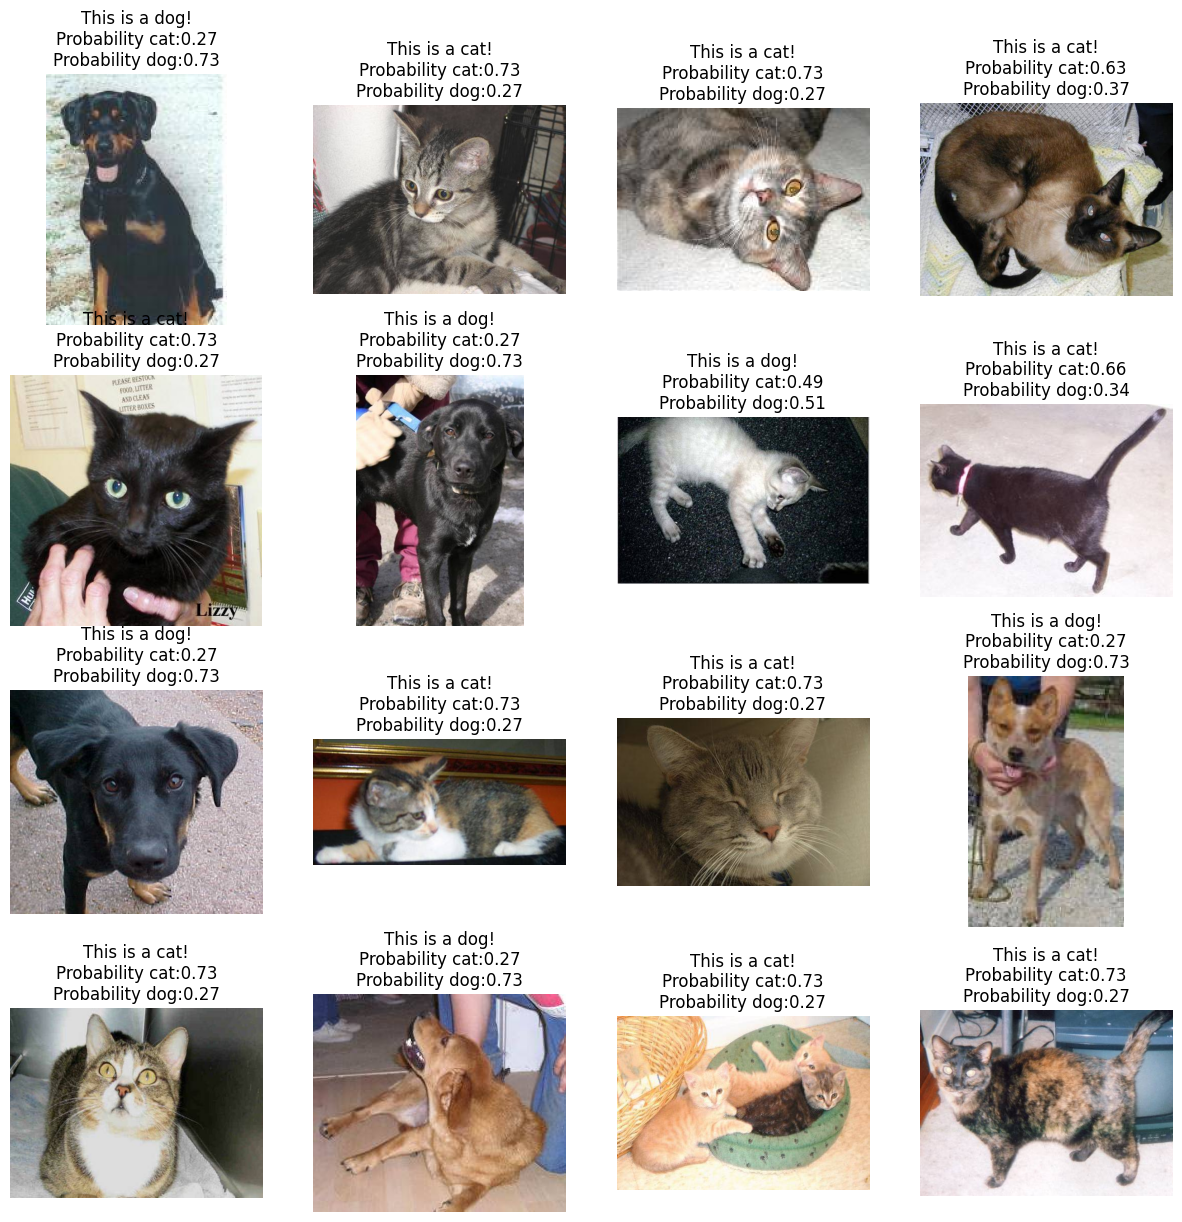

In [51]:
# Explore the data 
files_test = os.listdir("test")
random.seed(10)
random.shuffle(files_test)
fig = plt.figure(figsize=(15,15))
num_images = 16
transforms_test_val = transf.Compose([
                            transf.ToTensor(),
                            transf.Resize((256,256)), 
                            transf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])
model.eval()
with torch.no_grad():
  for num, fn in enumerate(files_test[:num_images]):
    path = os.path.join("test",fn)
    img = Image.open(path)
    out = model(transforms_test_val(img).unsqueeze(0).to(device))
    out = torch.softmax(out, dim=1)
    prediction = torch.argmax(out)
    plt.subplot(num_images//4,4,num+1)
    plt.axis('off')
    plt.imshow(img)
    if(prediction.item()==1):
      plt.title("This is a dog!\nProbability cat:"+str(round(torch.softmax(out,dim=1).squeeze().tolist()[0],2))+'\nProbability dog:'+str(round(torch.softmax(out,dim=1).squeeze().tolist()[1],2)))
    else:
      plt.title("This is a cat!\nProbability cat:"+str(round(torch.softmax(out,dim=1).squeeze().tolist()[0],2))+'\nProbability dog:'+str(round(torch.softmax(out,dim=1).squeeze().tolist()[1],2)))